In [1]:
import pandas as pd
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import yfinance as yf

In [2]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (16.,8.)})
sns.set_style("whitegrid")

## Loading the data 

In [3]:
df_merged = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_quandl.csv") # open the dataframe
df_merged['Date'] = df_merged["Date"].astype('datetime64[ns]') # change the date from object to datatime - important for visalization
df_merged

,Date,M2,S&P 500,CPI,RE Loan,Initial Claims,Revolving Credit,index,PMI
0,1871-01-01,NaN,105.76,NaN,NaN,NaN,NaN,NaN,NaN
1,1871-02-01,NaN,104.02,NaN,NaN,NaN,NaN,NaN,NaN
2,1871-03-01,NaN,105.01,NaN,NaN,NaN,NaN,NaN,NaN
3,1871-04-01,NaN,112.01,NaN,NaN,NaN,NaN,NaN,NaN
4,1871-05-01,NaN,117.56,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1818,2022-07-01,21578.8,3918.75,296.276,247933.0,NaN,NaN,NaN,NaN
1819,2022-08-01,21546.4,4167.51,296.171,247482.8,NaN,NaN,NaN,NaN
1820,2022-09-01,21459.5,3850.52,296.808,248786.1,NaN,NaN,NaN,NaN
1821,2022-10-01,21362.5,3726.05,298.012,250692.6,NaN,NaN,NaN,NaN


In [4]:
df_merged_2 = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_2_quandl.csv") # Open the dataframe
df_merged_2['Date'] = df_merged_2["Date"].astype('datetime64[ns]') # Change the date from object to datatime - important for visalization
df_merged_2

,Date,S&P 500,GDP,Cons. Sent.,US Big Mac
0,1871-01-01,105.76,NaN,NaN,NaN
1,1871-02-01,104.02,NaN,NaN,NaN
2,1871-03-01,105.01,NaN,NaN,NaN
3,1871-04-01,112.01,NaN,NaN,NaN
4,1871-05-01,117.56,NaN,NaN,NaN
...,...,...,...,...,...
1818,2022-07-01,3918.75,NaN,51.5,5.15
1819,2022-08-01,4167.51,NaN,58.2,NaN
1820,2022-09-01,3850.52,NaN,58.6,NaN
1821,2022-10-01,3726.05,NaN,59.9,NaN


## First Set of Economic Data  

[Text(0.5, 1.0, 'Consumer Price Index')]

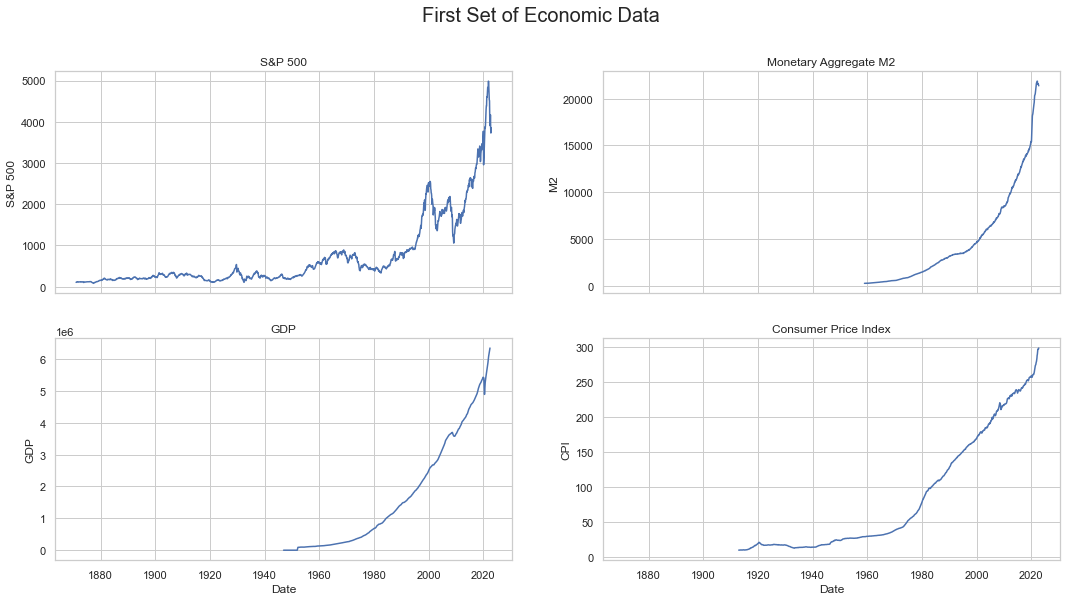

In [5]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,9))
figure.suptitle('First Set of Economic Data', fontsize=20)

sns.lineplot(ax=axes[0, 0], data=df_merged, x='Date', y='S&P 500').set(title='S&P 500')
sns.lineplot(ax=axes[0, 1], data=df_merged, x='Date', y='M2').set(title='Monetary Aggregate M2')
sns.lineplot(ax=axes[1, 0], data=df_merged_2, x='Date', y='GDP').set(title='GDP')
sns.lineplot(ax=axes[1, 1], data=df_merged, x='Date', y='CPI').set(title='Consumer Price Index')

## Second Set of Economic Data 

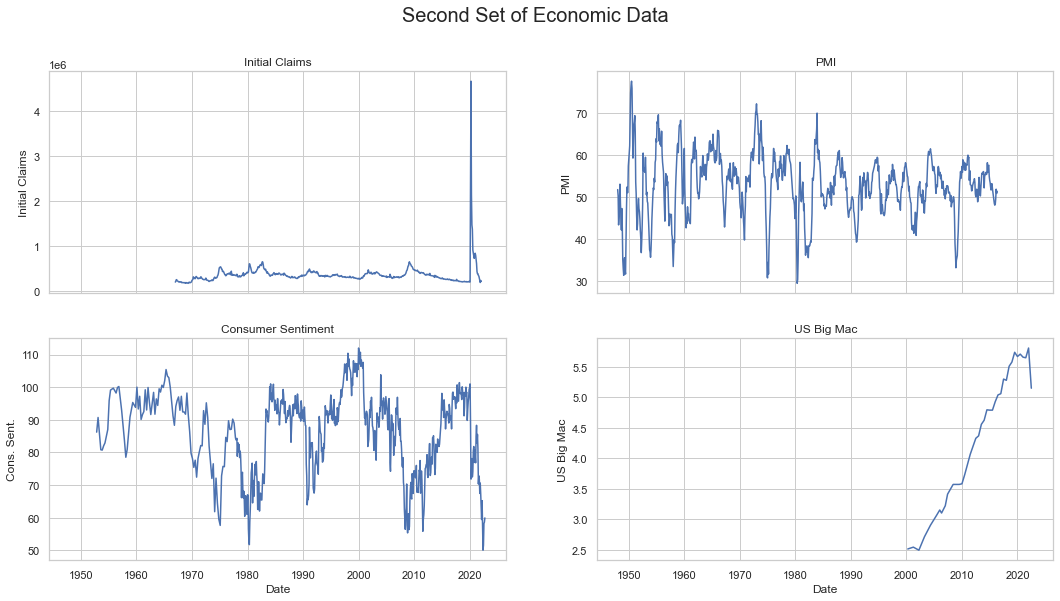

In [6]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,9))
figure.suptitle('Second Set of Economic Data', fontsize=20)

graph_1 = sns.lineplot(ax=axes[0, 0], data=df_merged, x='Date', y='Initial Claims').set(title='Initial Claims')
graph_2 = sns.lineplot(ax=axes[0, 1], data=df_merged, x='Date', y='PMI').set(title='PMI')
graph_3 = sns.lineplot(ax=axes[1, 0], data=df_merged_2, x='Date', y='Cons. Sent.').set(title='Consumer Sentiment')
graph_4 = sns.lineplot(ax=axes[1, 1], data=df_merged_2, x='Date', y='US Big Mac').set(title='US Big Mac')

## Third Set of Economic Data 

[Text(0.5, 1.0, 'Revolving Credit')]

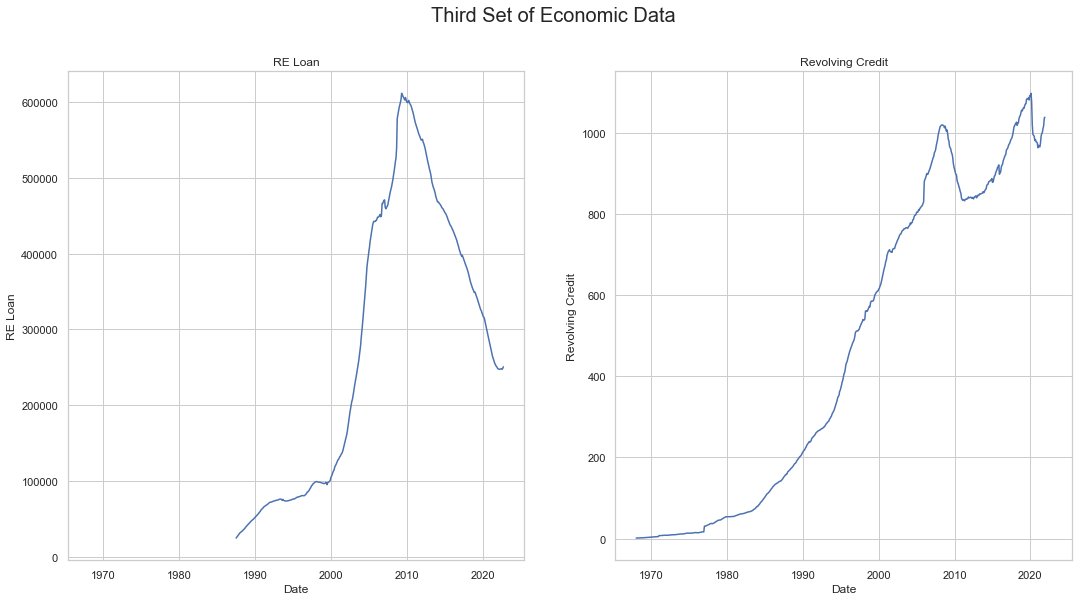

In [7]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(18,9))
figure.suptitle('Third Set of Economic Data', fontsize=20)

sns.lineplot(ax=axes[0], data=df_merged, x='Date', y='RE Loan').set(title='RE Loan')
sns.lineplot(ax=axes[1], data=df_merged, x='Date', y='Revolving Credit').set(title='Revolving Credit')

## Correlation matrix  

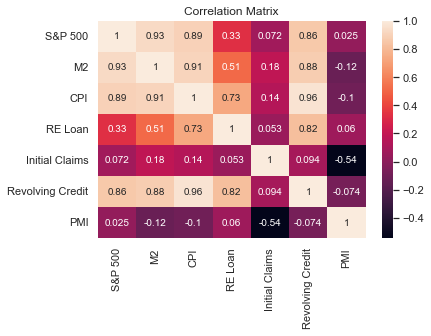

In [8]:
corr_matrix = df_merged[['S&P 500','M2','CPI', 'RE Loan','Initial Claims', 'Revolving Credit', 'PMI']].corr()
sns.heatmap(corr_matrix, annot=True).set(title='Correlation Matrix')
plt.show()

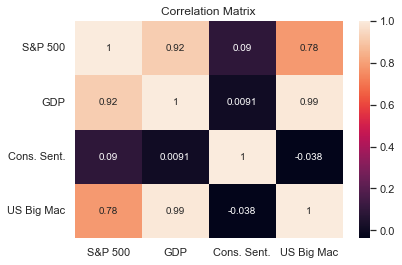

In [9]:
corr_matrix_2 = df_merged_2[['S&P 500','GDP','Cons. Sent.', 'US Big Mac']].corr()
sns.heatmap(corr_matrix_2, annot=True).set(title='Correlation Matrix')
plt.show()

## S&P Monthly Returns from 1871 to 2022

In [10]:
df_merged['monthly_return'] = (df_merged['S&P 500']/ df_merged['S&P 500'].shift(1)) -1
df_merged['monthly_return']
df = pd.DataFrame(df_merged['monthly_return']) 

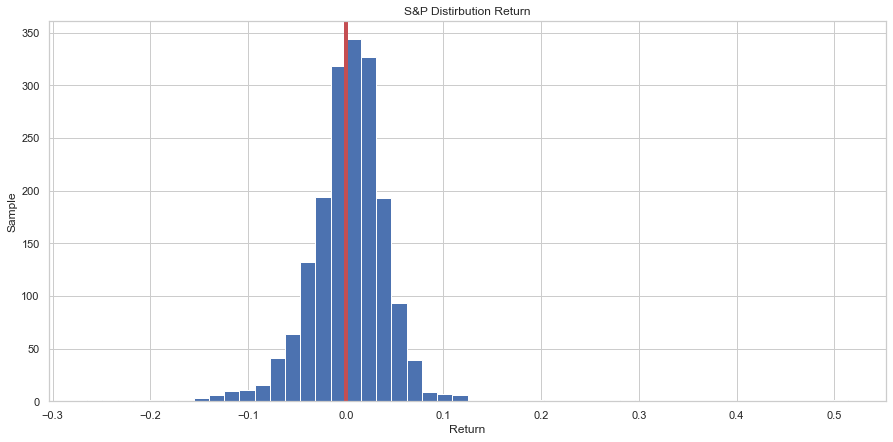

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
df_merged['monthly_return'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Sample')
ax1.set_title('S&P Distirbution Return')
plt.axvline(x=0, color='r', linewidth=4, linestyle='-')
plt.show()

In [12]:
pos_count, neg_count = 0, 0

for num in df['monthly_return']:
    if num >= 0:
        pos_count += 1
    else:
        neg_count += 1

print("Positive numbers in the list: ", pos_count)
print("Negative numbers in the list: ", neg_count)

Positive numbers in the list:  1032
Negative numbers in the list:  791


## S&P Annual Returns from 1871 to 2022

In [13]:
df = df_merged[['Date','S&P 500']]
df['annual_return'] = (df['S&P 500']/ df['S&P 500'].shift(12)) -1
df = df.iloc[::12,:]

C:\Users\rapha\AppData\Local\Temp\ipykernel_26048\532741283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['annual_return'] = (df['S&P 500']/ df['S&P 500'].shift(12)) -1


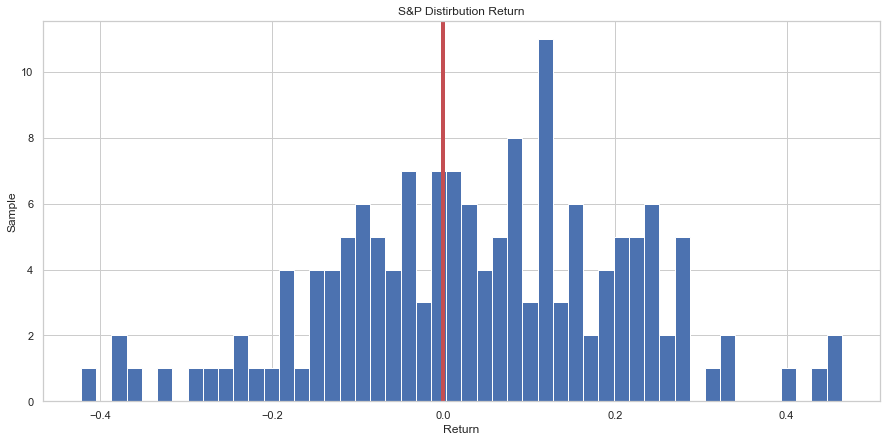

In [14]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
df['annual_return'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Sample')
ax1.set_title('S&P Distirbution Return')
plt.axvline(x=0, color='r', linewidth=4, linestyle='-')
plt.show()

In [15]:
pos_count, neg_count = 0, 0

for num in df['annual_return']:
    if num >= 0:
        pos_count += 1
    else:
        neg_count += 1

print("Positive numbers in the list: ", pos_count)
print("Negative numbers in the list: ", neg_count)

Positive numbers in the list:  90
Negative numbers in the list:  62


## Sector Distribution in the S&P 500

(503, 9)


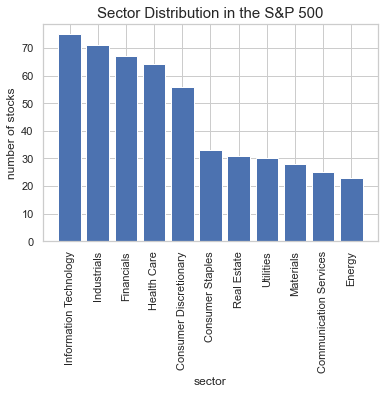

In [16]:
#retrived from https://wire.insiderfinance.io/data-analysis-of-s-p500-stocks-in-python-investment-strategy-during-post-pandemic-a7cf8926ee3e

tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = tables[0]
second_table = tables[1]

df = first_table
print(df.shape)
df["Symbol"] = df["Symbol"].map(lambda x: x.replace(".", "-"))  # rename symbol to escape symbol error
sp500_tickers = list(df["Symbol"])
df.head()

plt.title('Sector Distribution in the S&P 500', fontsize=15)
sectors = df["GICS Sector"].value_counts()
plt.bar(sectors.index, sectors.values)
plt.xticks(rotation=90)
plt.xlabel("sector")
plt.ylabel("number of stocks")
plt.show()

## Rebasing the different paremeters to 100 and see their evolution starting in 1987

In [17]:
df_merged = df_merged.dropna()
df_merged.drop(['monthly_return'], axis=1, inplace = True) # to drop two unecessary columns
df_merged =df_merged.set_index('Date')
df_merged

C:\Users\rapha\AppData\Local\Temp\ipykernel_26048\647220065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged.drop(['monthly_return'], axis=1, inplace = True) # to drop two unecessary columns


,M2,S&P 500,CPI,RE Loan,Initial Claims,Revolving Credit,index,PMI
Date,,,,,,,,
1987-07-01,2785.2,808.79,113.800,25001.4,319250.0,152.39741,474.0,57.5
1987-08-01,2787.5,854.62,114.400,26182.3,325600.0,153.87120,475.0,59.3
1987-09-01,2793.3,822.55,115.000,27443.4,309750.0,156.46089,476.0,60.0
1987-10-01,2811.2,721.30,115.300,28477.1,300000.0,158.07433,477.0,60.7
1987-11-01,2821.6,630.14,115.400,29571.7,306750.0,158.01895,478.0,58.8
...,...,...,...,...,...,...,...,...
2016-01-01,12453.9,2403.62,236.916,432475.8,279600.0,901.67300,816.0,48.2
2016-02-01,12498.3,2383.89,237.111,431020.7,266750.0,904.17680,817.0,49.5
2016-03-01,12656.4,2520.16,238.132,429056.3,263250.0,915.85886,818.0,51.8


In [18]:
def rebase(prices):
    return prices/prices[0]*100

In [21]:
df_rebase_1 = pd.DataFrame(rebase(df_merged['S&P 500']))
df_rebase_2 = pd.DataFrame(rebase(df_merged['M2']))
df_rebase_3 = pd.DataFrame(rebase(df_merged['CPI']))
df_rebase_4 = pd.DataFrame(rebase(df_merged['RE Loan']))
df_rebase_5 = pd.DataFrame(rebase(df_merged['Initial Claims']))
df_rebase_6 = pd.DataFrame(rebase(df_merged['Revolving Credit']))
df_rebase_7 = pd.DataFrame(rebase(df_merged['PMI']))


In [23]:
df_rebase_all = df_rebase_1.join(df_rebase_2).join(df_rebase_3).join(df_rebase_4).join(df_rebase_5).join(df_rebase_6).join(df_rebase_7)
#df_rebase_all = df_rebase_all.set_index(pd.DatetimeIndex(df_rebase_all['Date'].values))
#df_rebase_all = df_rebase_all.drop('Date', axis =1)

In [24]:
df_rebase_all

,S&P 500,M2,CPI,RE Loan,Initial Claims,Revolving Credit,PMI
Date,,,,,,,
1987-07-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1987-08-01,105.666489,100.082579,100.527241,104.723335,101.989037,100.967070,103.130435
1987-09-01,101.701307,100.290823,101.054482,109.767453,97.024276,102.666371,104.347826
1987-10-01,89.182606,100.933506,101.318102,113.902021,93.970243,103.725076,105.565217
1987-11-01,77.911448,101.306908,101.405975,118.280176,96.084573,103.688737,102.260870
...,...,...,...,...,...,...,...
2016-01-01,297.187156,447.145627,208.186292,1729.806331,87.580266,591.659005,83.826087
2016-02-01,294.747710,448.739767,208.357645,1723.986257,83.555208,593.301947,86.086957
2016-03-01,311.596335,454.416200,209.254833,1716.129097,82.458888,600.967471,90.086957


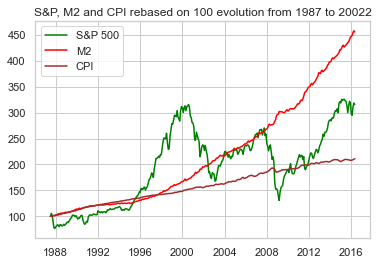

<Figure size 36000x36000 with 0 Axes>

In [54]:
fig, ax = plt.subplots()
plt.title('S&P, M2 and CPI rebased on 100 evolution from 1987 to 20022')
ax.plot(df_rebase_1, color = 'green', label = 'S&P 500')
ax.plot(df_rebase_2, color = 'red', label = 'M2')
ax.plot(df_rebase_3, color = 'brown', label = 'CPI')
ax.legend(loc = 'upper left')
plt.figure(figsize=(500, 500))
plt.show()


### Plotting the moving average  

In [ ]:
df_merged = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_quandl.csv") # open the dataframe
df_merged['Date'] = df_merged["Date"].astype('datetime64[ns]') # change the date from object to datatime - important for visalization
df_merged['Date'] = pd.to_datetime(df_merged['Date']) # putting back the day so we have beginning of the month everywhere
df_merged = df_merged.set_index(pd.DatetimeIndex(df_merged['Date'].values))
df_merged.drop(['Date','M2', 'CPI', 'RE Loan', 'Initial Claims', 'Revolving Credit', 'index', 'PMI'], axis = 1 , inplace = True)
df_merged = df_merged[1750:]
df_merged

In [ ]:
ma_months = [6,12,24]

for ma in ma_months:
    column_name = "MA for %s months" %(str(ma))
    
    df_merged[column_name] = df_merged['S&P 500'].rolling(window=ma,center=False).mean()

df_merged.tail()

In [ ]:
df_merged[['S&P 500','MA for 6 months','MA for 12 months','MA for 24 months']].plot(subplots=False,figsize=(12,5))
